# Data Understanding


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [44]:
df=pd.read_csv("/content/laptop.csv")

In [45]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,6.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,7.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,8.0,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,9.0,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [47]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [48]:
numerical_columns=df.select_dtypes(include='number').columns.to_list()
categorical_columns=df.select_dtypes(include='object').columns.to_list()
print("numerical_columns are: ",numerical_columns)
print("categorical_columns are: ",categorical_columns)

numerical_columns are:  ['Unnamed: 0.1', 'Unnamed: 0', 'Price']
categorical_columns are:  ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']


# Data Preprocessing(cleaning)

In [49]:
#Drop unnecessary columns
df=df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [50]:
print("Missing Values in Each Column: ")
df.isnull().sum()

Missing Values in Each Column: 


,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


In [51]:
#Drop missing values
df.dropna(inplace=True)

In [52]:
print("Duplicated Values: ")
df.duplicated().sum()
# df[df.duplicated()]

Duplicated Values: 


np.int64(29)

In [ ]:
#Drop duplicated values
df.drop_duplicates(inplace=True)

In [53]:
# Summary statistics for numerical columns
print("Summary Statistics: ")
df.describe()

Summary Statistics: 


,Price
count,1273.000000
mean,59955.814073
std,37332.251005
min,9270.720000
25%,31914.720000
50%,52161.120000
75%,79333.387200
max,324954.720000


In [54]:
# Summary statistics for categorical columns
print("Categorical Feature Summary: ")
df.describe(include=["object"])

Categorical Feature Summary: 


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273
unique,19,6,25,40,118,10,40,110,9,189
top,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,290,710,640,495,183,601,401,271,1047,111


In [55]:
# Replacing incorrect data with nan values
df['Inches']=df['Inches'].replace('?',np.nan)
df['Weight']=df['Weight'].replace('?',np.nan)
df['Memory']=df['Memory'].replace('?',np.nan)

In [56]:
# Dropping Null values
df.isnull().sum()
df.dropna(inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1270 non-null   object 
 1   TypeName          1270 non-null   object 
 2   Inches            1270 non-null   object 
 3   ScreenResolution  1270 non-null   object 
 4   Cpu               1270 non-null   object 
 5   Ram               1270 non-null   object 
 6   Memory            1270 non-null   object 
 7   Gpu               1270 non-null   object 
 8   OpSys             1270 non-null   object 
 9   Weight            1270 non-null   object 
 10  Price             1270 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.1+ KB


In [58]:
# Changing datatype
df['Inches']=df['Inches'].astype(float)
df['Ram']=df['Ram'].str.replace('GB','').astype(int)
df['Weight']=df['Weight'].str.replace('kg','').astype(float)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1270 non-null   object 
 1   TypeName          1270 non-null   object 
 2   Inches            1270 non-null   float64
 3   ScreenResolution  1270 non-null   object 
 4   Cpu               1270 non-null   object 
 5   Ram               1270 non-null   int64  
 6   Memory            1270 non-null   object 
 7   Gpu               1270 non-null   object 
 8   OpSys             1270 non-null   object 
 9   Weight            1270 non-null   float64
 10  Price             1270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 119.1+ KB


<Axes: xlabel='Company'>

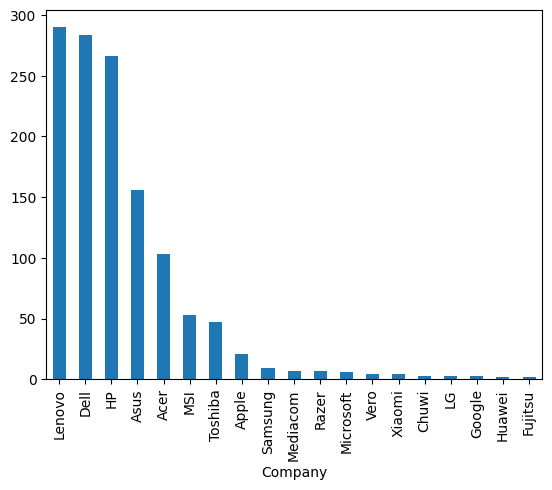

In [60]:
df['Company'].value_counts().plot(kind='bar')

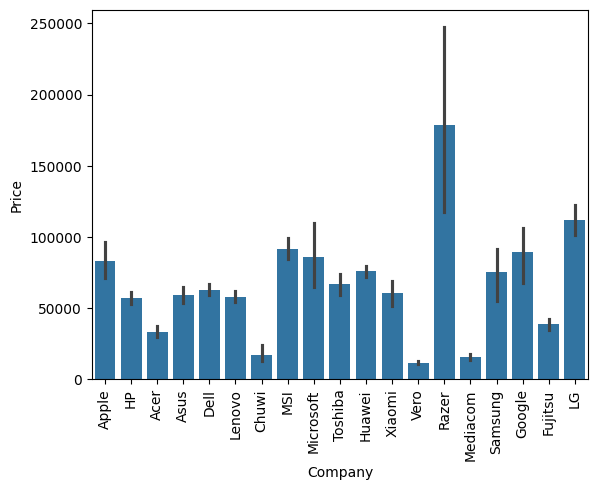

In [61]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

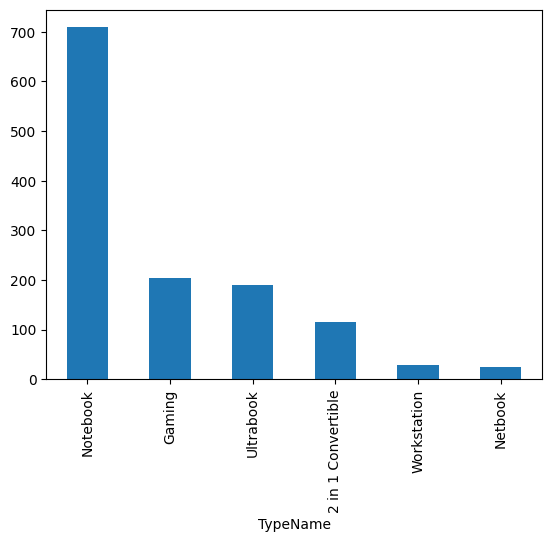

In [62]:
df['TypeName'].value_counts().plot(kind='bar')

# Feature Engineering

In [ ]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200


In [63]:
df['Cpu_type']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [64]:
# seperating cpu brand
def cpu_brand(text):
  if text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7':
    return text
  else:
    if text.split()[0]=='Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

df['Cpu_type']=df['Cpu_type'].apply(cpu_brand)
df.drop(columns=['Cpu'],inplace=True)

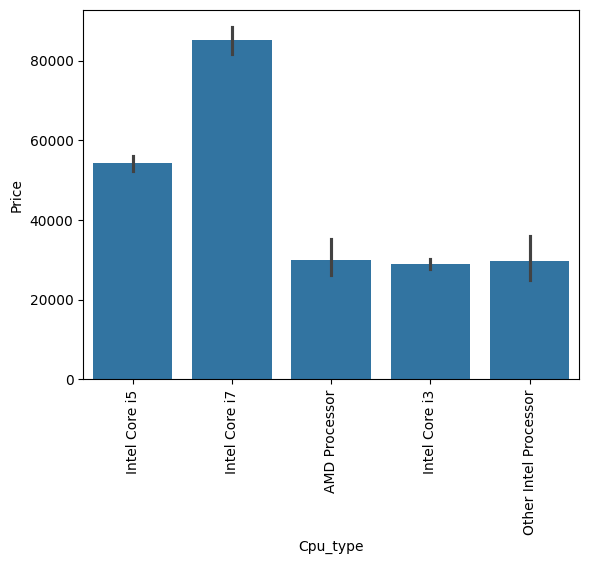

In [65]:
sns.barplot(x=df['Cpu_type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [67]:
resolution_split=df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
df['x_res']=resolution_split[0].astype(float)
df['y_res']=resolution_split[0].astype(float)
df['ppi']=((df['x_res']**2 + df['y_res']**2)**0.5)/df['Inches'].astype(float) #ppi(pixels per inch)

In [68]:
df.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [69]:
# Splitting memory column into each individual memory type(SSD,HDD,Hybrid,Flash_Storage)
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)
df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


In [71]:
# Dropping memory column
df.drop(columns=['Memory','Flash_Storage','Hybrid'],inplace=True)


In [70]:
df['Gpu_type']=df['Gpu'].apply(lambda x: x.split()[0])
df.drop(columns=['Gpu'],inplace=True)

In [72]:
df['OS']=df['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else
                                     'MacOS' if 'macOS' in x else
                                     'Linux' if 'Linux' in x else
                                     'No OS' if 'No OS' in x else
                                     'Other')

In [73]:
df.drop(columns=['OpSys'],inplace=True)

In [74]:
df

,Company,TypeName,Ram,Weight,Price,Cpu_type,Touchscreen,IPS,ppi,HDD,SSD,Gpu_type,OS
0,Apple,Ultrabook,8,1.37,71378.6832,Intel Core i5,0,1,272.209528,0,128,Intel,MacOS
1,Apple,Ultrabook,8,1.34,47895.5232,Intel Core i5,0,0,153.117859,0,0,Intel,MacOS
2,HP,Notebook,8,1.86,30636.0000,Intel Core i5,0,0,174.057054,0,256,Intel,No OS
3,Apple,Ultrabook,16,1.83,135195.3360,Intel Core i7,0,1,264.476303,0,512,AMD,MacOS
4,Apple,Ultrabook,8,1.37,96095.8080,Intel Core i5,0,1,272.209528,0,256,Intel,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,Intel Core i7,1,1,193.949289,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,Intel Core i7,1,1,340.261910,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,Other Intel Processor,0,0,137.986838,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,Intel Core i7,0,0,123.834341,1000,0,AMD,Windows


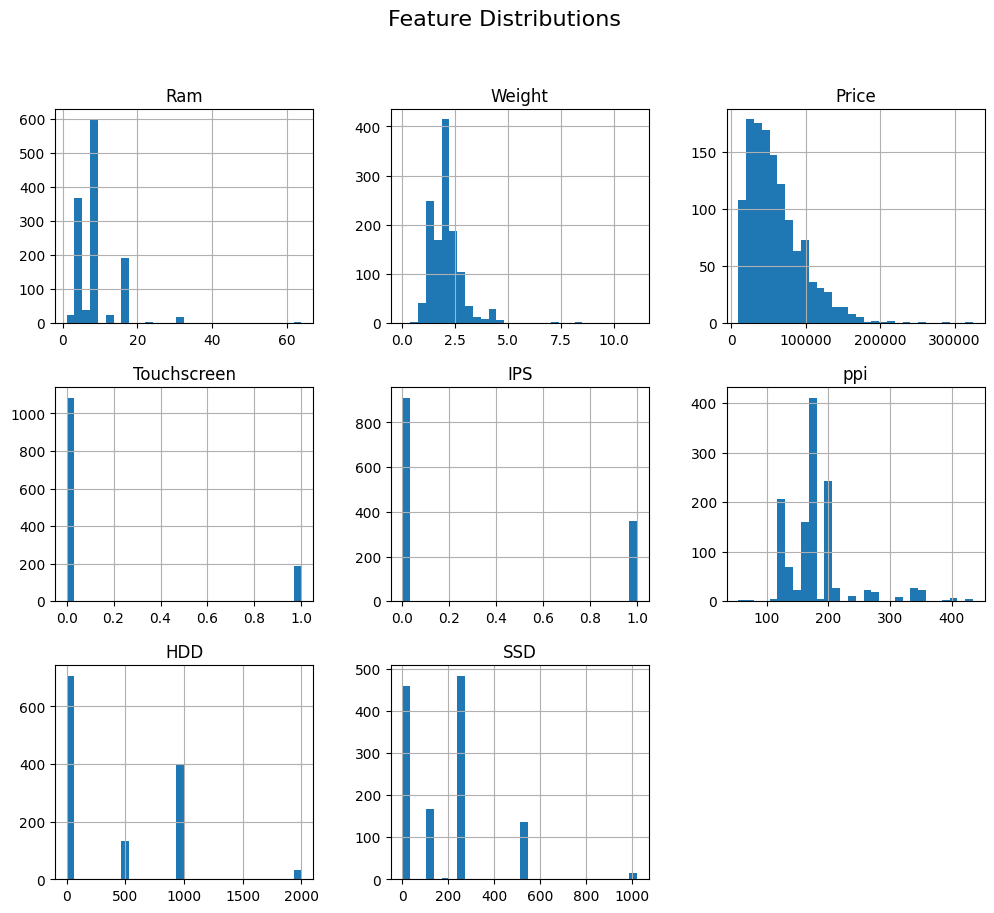

In [75]:
# Histogram for numerical columns
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

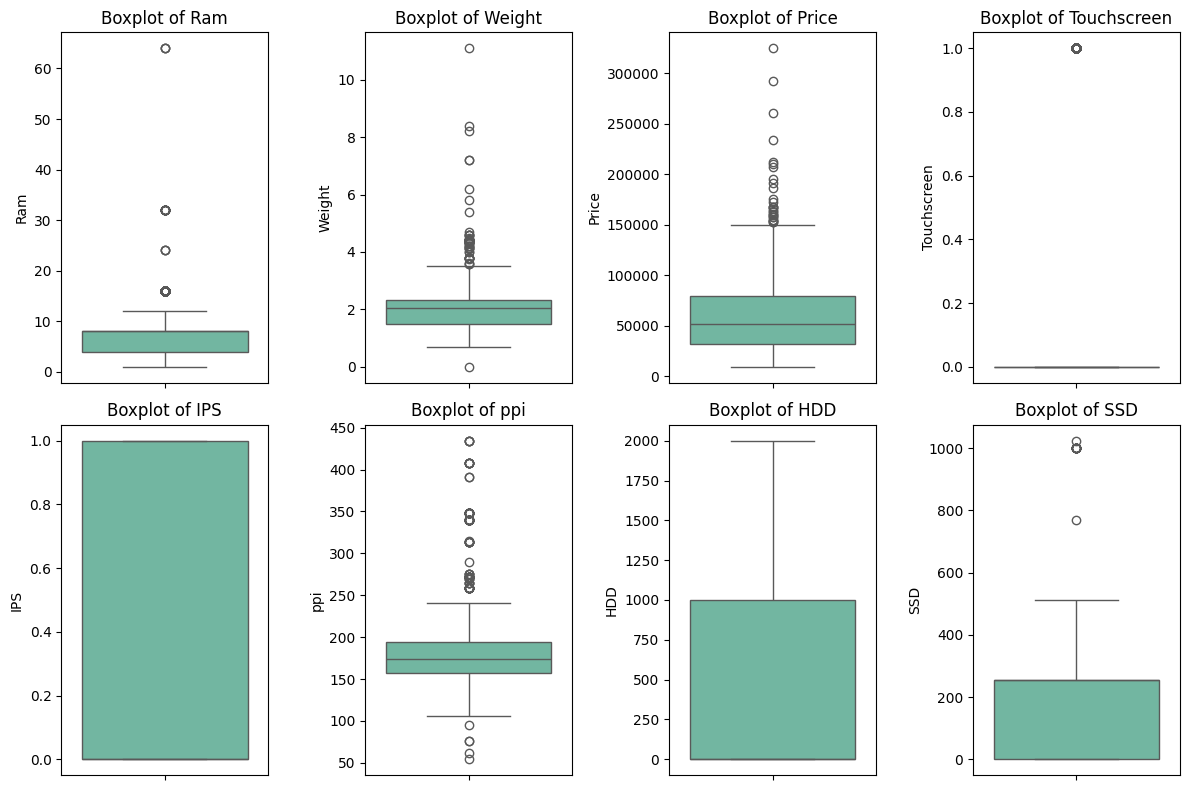

In [76]:
# Boxplot for numerical features to check for outliers
numerical_features = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, y=col, palette="Set2")
    plt.title(f"Boxplot of {col}")
    # plt.ylabel("")
plt.tight_layout()
plt.show()

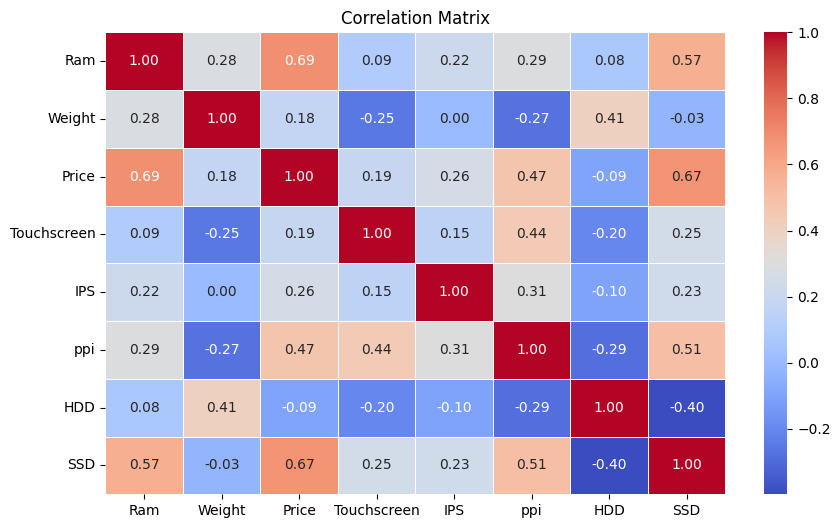

In [77]:
# Correlation matrix (only for numerical features)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Handling Outliers

In [78]:
from scipy.stats import zscore

# Detect outliers using zscore
numeric_col=df.select_dtypes(include=['number']).columns.to_list()
z_scores = np.abs(zscore(df[numeric_col]))
outliers_z=(z_scores > 3).sum(axis=0)
print(f'{numeric_col}\n{outliers_z}')
print("Outliers detected using Z-Score:\n", outliers_z.sum())

['Ram', 'Weight', 'Price', 'Touchscreen', 'IPS', 'ppi', 'HDD', 'SSD']
[20 13 12  0  0 61 32 17]
Outliers detected using Z-Score:
 155


In [79]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected using IQR:\n", outliers_iqr)


Outliers detected using IQR:
 Ram            216
Weight          55
Price           28
Touchscreen    185
IPS              0
ppi            116
HDD              0
SSD             17
dtype: int64


In [80]:
# Removing Outliers using IQR
num_col=df.select_dtypes(include=['number'])
Q1=num_col.quantile(0.25)
Q3=num_col.quantile(0.75)
IQR=Q3-Q1
upper_limit=Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)
outlier_mask=(num_col<lower_limit) | (num_col>upper_limit)
df_cleaned = df[~outlier_mask.any(axis=1)]
print("Original Data Shape:", df.shape)
print("After IQR Outlier Removal:", df_cleaned.shape)

Original Data Shape: (1270, 13)
After IQR Outlier Removal: (872, 13)


In [81]:
from scipy.stats.mstats import winsorize

df_winsor = df.copy()

# Apply Winsorization to numerical columns (capping extreme values at 5% and 95%)
for col in df.select_dtypes(include=['number']).columns:
    df_winsor[col] = winsorize(df[col], limits=[0.05, 0.05])

print("Original Data Shape:", df.shape)
print("After Winsorization (Capping):", df_winsor.shape)

Original Data Shape: (1270, 13)
After Winsorization (Capping): (1270, 13)


#Scaling


In [82]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Create separate copies of the dataset for each scaling method
df_minmax = df.copy()
df_standard = df.copy()
df_robust = df.copy()

In [83]:
# Selecting only numerical columns for scaling
num_cols = df.select_dtypes(include=['number']).columns

In [84]:
# Min-Max Scaling (0 to 1 Range)
minmax_scaler = MinMaxScaler()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])

In [85]:
# Standard Scaling (Mean = 0, Std = 1)
standard_scaler = StandardScaler()
df_standard[num_cols] = standard_scaler.fit_transform(df_standard[num_cols])

In [86]:
# Robust Scaling (Uses Median & IQR - Good for Outliers)
robust_scaler = RobustScaler()
df_robust[num_cols] = robust_scaler.fit_transform(df_robust[num_cols])

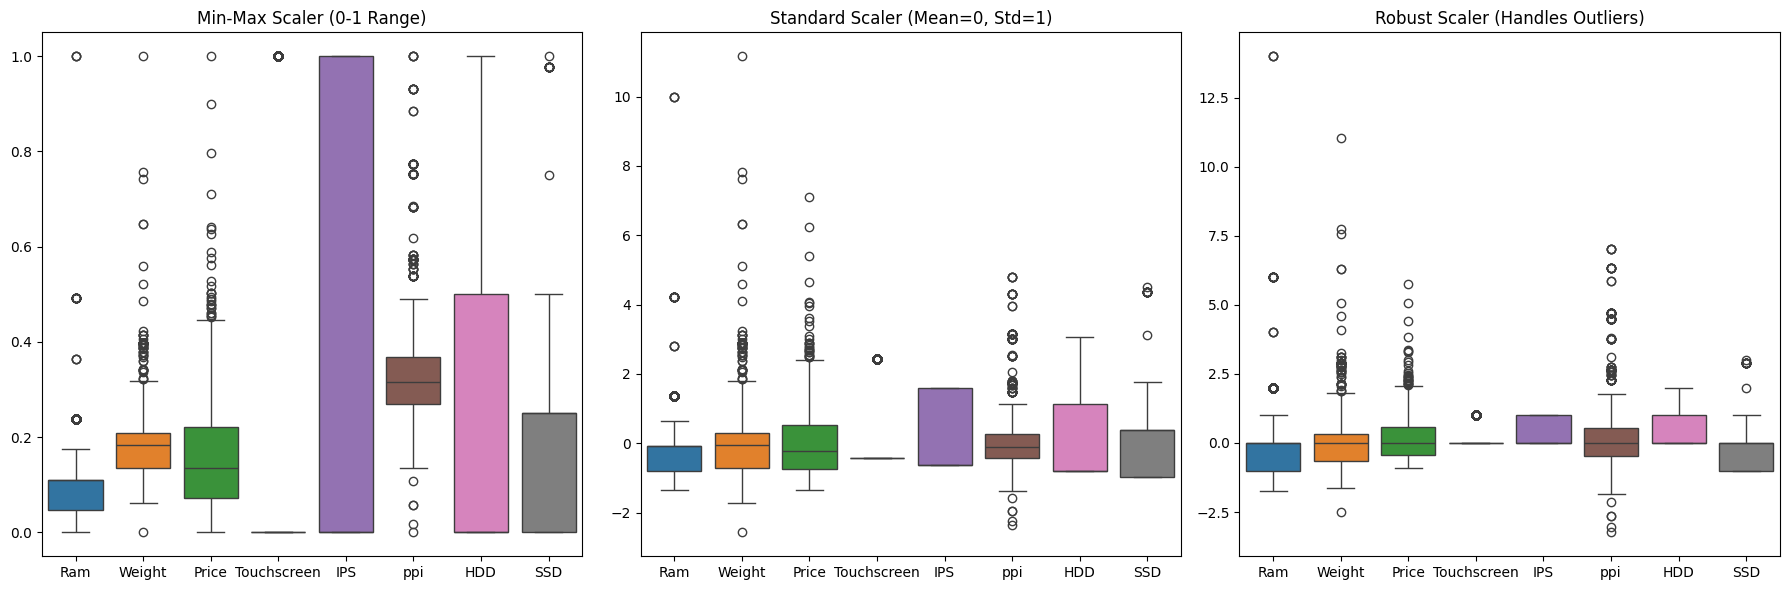

In [87]:
# Visualizing the Differences

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Min-Max Scaler
sns.boxplot(data=df_minmax, ax=axes[0])
axes[0].set_title("Min-Max Scaler (0-1 Range)")

# Standard Scaler
sns.boxplot(data=df_standard, ax=axes[1])
axes[1].set_title("Standard Scaler (Mean=0, Std=1)")

# Robust Scaler
sns.boxplot(data=df_robust, ax=axes[2])
axes[2].set_title("Robust Scaler (Handles Outliers)")

plt.tight_layout()
plt.show()

#Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Selecting categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

In [89]:
# Label Encoding
df_label_encoded = df.copy()
label_encoder = LabelEncoder()
for col in cat_cols:
    df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])

In [90]:
# Display results
print("Label Encoded Data:")
print(df_label_encoded.head())
print("\nUnique Values in Each Column:")
print(df_label_encoded.shape)

Label Encoded Data:
   Company  TypeName  Ram  Weight        Price  Cpu_type  Touchscreen  IPS  \
0        1         4    8    1.37   71378.6832         2            0    1   
1        1         4    8    1.34   47895.5232         2            0    0   
2        7         3    8    1.86   30636.0000         2            0    0   
3        1         4   16    1.83  135195.3360         3            0    1   
4        1         4    8    1.37   96095.8080         2            0    1   

          ppi  HDD  SSD  Gpu_type  OS  
0  272.209528    0  128         2   1  
1  153.117859    0    0         2   1  
2  174.057054    0  256         2   2  
3  264.476303    0  512         0   1  
4  272.209528    0  256         2   1  

Unique Values in Each Column:
(1270, 13)


In [91]:
# One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [92]:
print("\nOne-Hot Encoded Data:")
print(df_one_hot_encoded.head())
print(df_one_hot_encoded.shape)


One-Hot Encoded Data:
   Ram  Weight        Price  Touchscreen  IPS         ppi  HDD  SSD  \
0    8    1.37   71378.6832            0    1  272.209528    0  128   
1    8    1.34   47895.5232            0    0  153.117859    0    0   
2    8    1.86   30636.0000            0    0  174.057054    0  256   
3   16    1.83  135195.3360            0    1  264.476303    0  512   
4    8    1.37   96095.8080            0    1  272.209528    0  256   

   Company_Apple  Company_Asus  ...  Cpu_type_Intel Core i5  \
0           True         False  ...                    True   
1           True         False  ...                    True   
2          False         False  ...                    True   
3           True         False  ...                   False   
4           True         False  ...                    True   

   Cpu_type_Intel Core i7  Cpu_type_Other Intel Processor  Gpu_type_ARM  \
0                   False                           False         False   
1                   F

# **Data Splitting (Train-Test Split)**

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# Define features (X) and target variable (y)
X=df_label_encoded.drop(columns=['Price']) # Features
y=df_label_encoded['Price'] # Target Variable

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Model Selection & Training**


###Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [97]:
LR_model=LinearRegression() # Initialize the model
LR_model.fit(X_train,y_train) # Train the model

LinearRegression()

In [98]:
# Make predictions on test data
y_pred=LR_model.predict(X_test)
# y_pred

In [99]:
# Evaluate
MSE=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
print("\nMSE is:\n ",MSE)
print("\nr2_score is:\n ",r2)
print("\nMAE is:\n ",MAE)


MSE is:
  429236622.4944115

r2_score is:
  0.6139637102570723

MAE is:
  14726.713351255841


###Models

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [106]:
models1={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "KNeighbourRegressor":KNeighborsRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

results = {}
for name, model in models1.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {"MAE": mae, "R²": r2}

In [107]:
results_df = pd.DataFrame(results).T
results_df.sort_values("R²", ascending=False)

,MAE,R²
RandomForestRegressor,9118.238019,0.815315
KNeighbourRegressor,12499.257260,0.718753
LinearRegression,14726.713351,0.613964
DecisionTreeRegressor,13173.751644,0.545440


###Cross Validation

In [108]:
from sklearn.model_selection import cross_val_score, cross_validate

In [109]:
models=[]
models.append(("Linear Regression",LinearRegression()))
models.append(("DecisionTreeRegressor",DecisionTreeRegressor()))
models.append(("KNeighboursRegressor",KNeighborsRegressor()))
models.append(("RandomForestREgressor",RandomForestRegressor()))
for model in models:
  result=cross_validate(model[1],X,y,cv=5, return_train_score=True,scoring='r2')
  print(model[0])
  train_acc=result['train_score'].mean()*100
  test_acc=result['test_score'].mean()*100
  print("Training accuracy: ",round(train_acc,2))
  print("Testing accuracy: ",round(test_acc,2))
  print('\n')

Linear Regression
Training accuracy:  65.59
Testing accuracy:  62.44


DecisionTreeRegressor
Training accuracy:  99.52
Testing accuracy:  60.41


KNeighboursRegressor
Training accuracy:  77.56
Testing accuracy:  60.84


RandomForestREgressor
Training accuracy:  96.87
Testing accuracy:  77.17




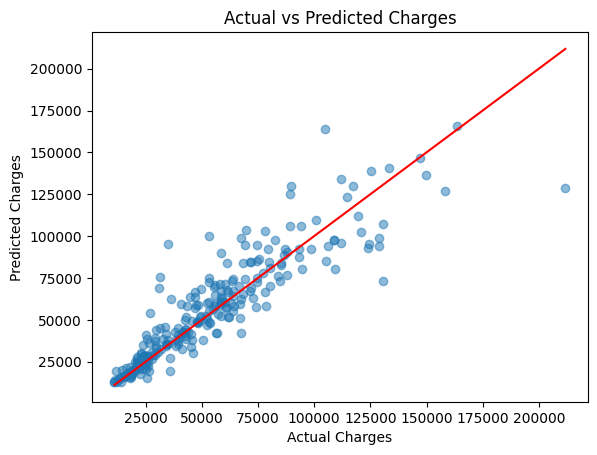

In [110]:
best_model = RandomForestRegressor().fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.show()